In [1]:
import pandas as pd
import numpy as np


In [2]:
table = pd.read_csv('merged.csv')
table = table.dropna()
print('\nBEFORE DROP NA ROWS')
print(table.isnull().sum())
data = table.drop(['id', 'link', 'productDisplayName', 'year', 'season', 'masterCategory'], axis=1)
print('\nAFTER DROP NA ROWS')
print(data.isnull().sum())


BEFORE DROP NA ROWS
id                    0
link                  0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

AFTER DROP NA ROWS
gender         0
subCategory    0
articleType    0
baseColour     0
usage          0
dtype: int64


In [3]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoders = {}

for col in data.columns:
    if data[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

In [84]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from kneed import KneeLocator

xrange = range(500,510)
wcss = []

for num_clusters in xrange:
    km = KMeans(n_clusters=num_clusters, max_iter=100, random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)


c:\Users\kayde\OneDrive\Desktop\frg-flask-app\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

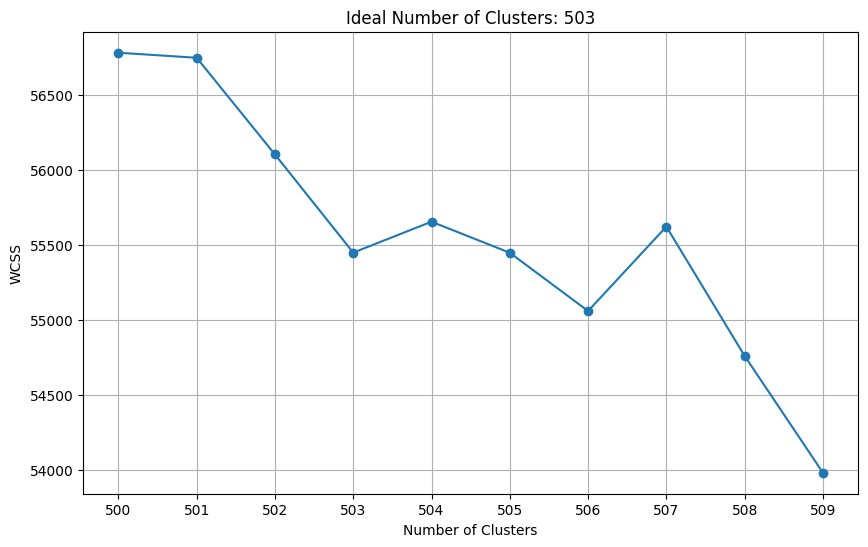

In [66]:

#locate the elbow
kn = KneeLocator(xrange, wcss, curve='convex', direction='decreasing').elbow


# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(xrange, wcss, marker='o')
plt.title('Ideal Number of Clusters: {kn}'.format(kn=kn))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(xrange)
plt.grid(True)
plt.show()

In [6]:
from joblib import dump
from datetime import datetime

final_kmeans = KMeans(n_clusters=1000, max_iter=100, random_state=42)
final_kmeans.fit(data)

table['cluster'] = final_kmeans.labels_
cluster_map = table[['cluster','id']]

dump(final_kmeans, 'kmeans.joblib')

dump(label_encoders, 'label_encoders.joblib')

dump(cluster_map, 'cluster_map.joblib')

c:\Users\kayde\OneDrive\Desktop\frg-flask-app\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['cluster_map.joblib']

In [88]:
# test the data on dummy input

input_dict = {
    'gender': 'Men',
    'subCategory': 'Topwear',
    'articleType': 'Shirts',
    'baseColour': 'Blue',
    'usage': 'Casual'
}

input_features = []

for col in label_encoders.keys():
    enc_inp = label_encoders[col].transform( [input_dict[col]] )[0]
    input_features.append(enc_inp)


predicted_cluster = final_kmeans.predict([input_features])[0]

print("Predicted cluster: ", predicted_cluster)

# pull all values of the cluster from table

cluster_data = table[table['cluster'] == predicted_cluster]

# print the result
cluster_data


Predicted cluster:  173


c:\Users\kayde\OneDrive\Desktop\frg-flask-app\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,id,link,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,cluster
144,6617,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Black,Summer,2011.0,Casual,Spykar Men Black and white Check Shirt,173
174,22395,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Mark Taylor Men Striped Blue Shirt,173
182,12500,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Black,Fall,2011.0,Casual,United Colors of Benetton Men Short Black Shirts,173
259,12190,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Basics Men Blue Slim Fit Checked Shirt,173
291,34036,http://assets.myntassets.com/v1/images/style/p...,Boys,Apparel,Topwear,Shirts,Blue,Summer,2012.0,Casual,Palm Tree Boys Check Blue Shirt,173
...,...,...,...,...,...,...,...,...,...,...,...,...
44092,19731,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Blue,Summer,2011.0,Casual,United Colors of Benetton Men Solid Blue Shirt,173
44141,58765,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Beige,Summer,2012.0,Casual,Locomotive Men Beige Shirt,173
44183,9624,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Indigo Nation Men Plain Light Blue Shirts,173
44237,5022,http://assets.myntassets.com/v1/images/style/p...,Men,Apparel,Topwear,Shirts,Blue,Summer,2011.0,Casual,Levis Kids Boy's Calcio Grey Blue Kidswear,173


In [89]:
cluster_map = table[['cluster','id']]
cluster_map

#dump
dump(cluster_map, 'cluster_map.joblib')

['cluster_map.joblib']

In [10]:
# different classes in gender, subCategory, articleType, baseColour, usage

for col in ['gender', 'subCategory', 'articleType', 'baseColour', 'usage']:
    print(col, table[col].unique())
    print('\n\n')

gender ['Men' 'Women' 'Boys' 'Girls' 'Unisex']



subCategory ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']



articleType ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sunglasses' 'Innerwear Vests' 'Pendant'
 'Laptop Bag' 'Scarves' 'D